## Load data from Gun Violence Archive 

In this analysis section, we decided to analysis the 

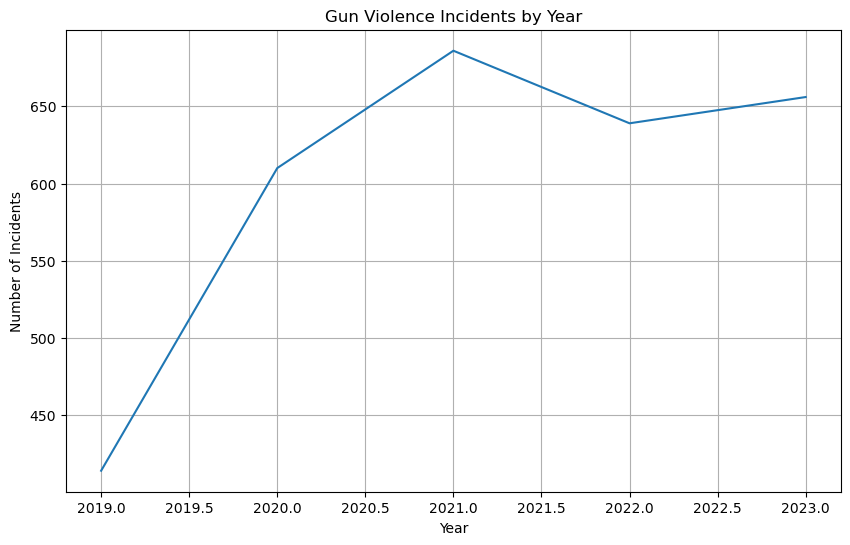

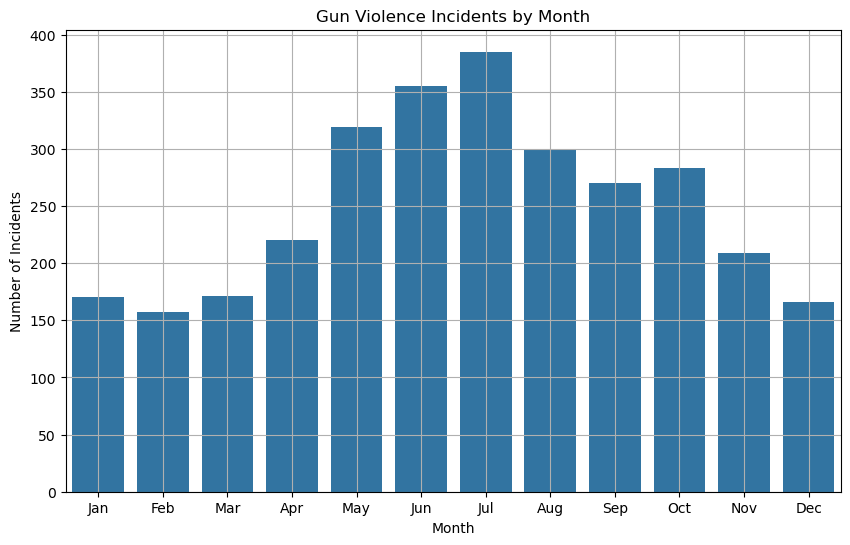

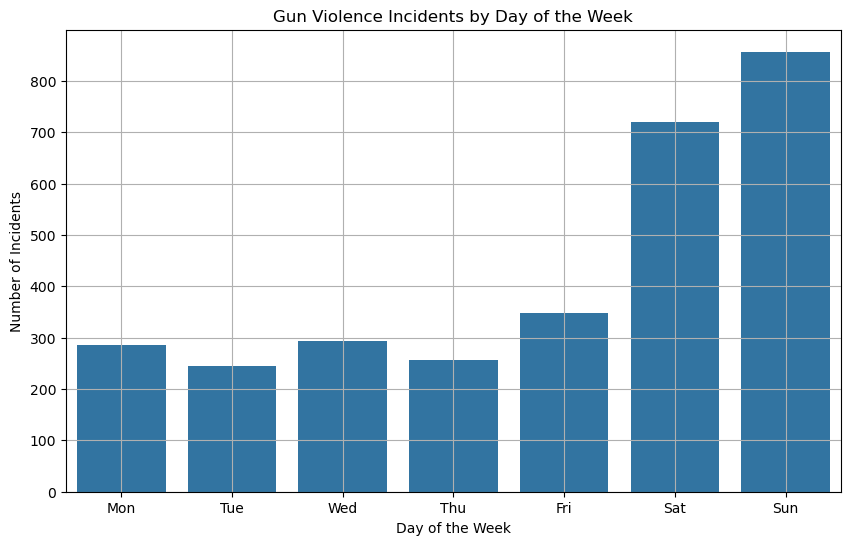

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (CSV or Excel)
file_path = 'ProcessedGunData.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)

# Convert 'Incident Date' column to datetime
data['Incident Date'] = pd.to_datetime(data['Incident Date'], errors='coerce')

# Extract year, month, and day of the week from 'Incident Date'
data['Year'] = data['Incident Date'].dt.year
data['Month'] = data['Incident Date'].dt.month
data['DayOfWeek'] = data['Incident Date'].dt.dayofweek  # Monday=0, Sunday=6

# Temporal Analysis 1: Incidents by Year
yearly_incidents = data.groupby('Year').size()

# Plotting Incidents by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_incidents.index, y=yearly_incidents.values)
plt.title('Gun Violence Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# Temporal Analysis 2: Incidents by Month (Seasonality)
monthly_incidents = data.groupby('Month').size()

# Plotting Incidents by Month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_incidents.index, y=monthly_incidents.values)
plt.title('Gun Violence Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(monthly_incidents.index - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Temporal Analysis 3: Incidents by Day of the Week
day_of_week_incidents = data.groupby('DayOfWeek').size()

# Plotting Incidents by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_incidents.index, y=day_of_week_incidents.values)
plt.title('Gun Violence Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(day_of_week_incidents.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()


In [24]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Load the data
file_path = 'ProcessedGunData.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Convert 'Incident Date' to datetime
data['Incident Date'] = pd.to_datetime(data['Incident Date'], errors='coerce')

# Create a Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.Div([
        # Dropdown for selecting a state
        dcc.Dropdown(
            id='state-dropdown',
            options=[{'label': state, 'value': state} for state in data['State'].unique()],
            value=data['State'].unique()[0],  # Default to the first state in the list
        ),
        html.Div(id='selected-state-output')
    ]),
    html.Div([
        dcc.Graph(id='bar-plot-by-year'), 
        dcc.Graph(id='bar-plot-by-week'),
        dcc.Graph(id='bar-plot-by-month')
    ])
])

# Callback to update the plots based on selected state
@app.callback(
    [Output("bar-plot-by-year", 'figure'), 
     Output('bar-plot-by-week', 'figure'),
     Output('bar-plot-by-month', 'figure')],
    [Input('state-dropdown', 'value')]
)
def update_plots(selected_state):
    # Filter the data based on the selected state
    state_data = data[data['State'] == selected_state]

    yearly_incidents = state_data['Year'].value_counts().reset_index()
    yearly_incidents.columns = ['Year', 'Incidents']
    yearly_incidents = yearly_incidents.sort_values('Year')  # Sort by year
    year_fig = px.bar(yearly_incidents, x='Year', y='Incidents', title=f'Gun Violence Incidents by Year in {selected_state}')
    
    # Create a bar plot for incidents by day of the week
    incidents_by_day = state_data['Incident Date'].dt.day_name().value_counts().sort_index().reset_index()
    incidents_by_day.columns = ['Day of Week', 'Number of Incidents']
    fig_by_day = px.bar(incidents_by_day, x='Day of Week', y='Number of Incidents', title=f'Gun Violence Incidents by Day of Week in {selected_state}')
    
    # Create a bar plot for incidents by month
    incidents_by_month = state_data['Incident Date'].dt.month_name().value_counts().sort_index().reset_index()
    incidents_by_month.columns = ['Month', 'Number of Incidents']
    fig_by_month = px.bar(incidents_by_month, x='Month', y='Number of Incidents', title=f'Gun Violence Incidents by Month in {selected_state}')
    
    return year_fig, fig_by_day, fig_by_month

if __name__ == '__main__':
    app.run_server(debug=True)
